In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import expit
import numpy as np
import torch

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import LeaveOneOut, KFold

In [45]:
np.random.seed(0)
l = 40
x = np.linspace(0,30, num=l)
Y = x+4*np.sin(x)+3*np.random.randn(l)
X = np.vstack([np.ones_like(x),x,np.sin(x)]).T
w = np.linalg.inv(X.T@X)@X.T@Y

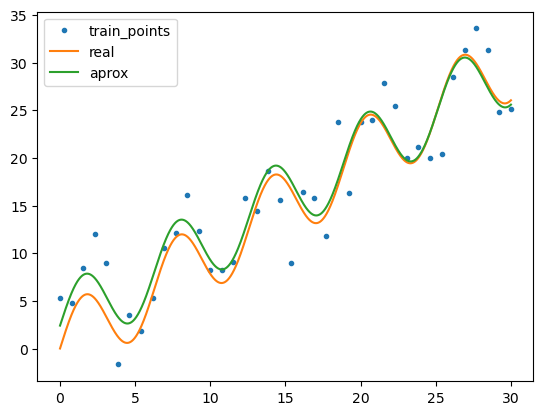

In [46]:
plt.plot(x,Y,'.', label='train_points')
x_plot = np.linspace(0,30,num=10000)
plt.plot(x_plot,4*np.sin(x_plot)+x_plot, label="real")

X_plot = np.vstack([np.ones_like(x_plot),x_plot,np.sin(x_plot)]).T
plt.plot(x_plot, X_plot@w, label="aprox")
plt.legend(loc='best')

In [102]:
X = torch.randn(10,2)
w_true = torch.rand(2)
Y = X@w_true
w = torch.randn(2,requires_grad=True)
L = ((X@w-Y)**2).sum()

In [103]:
w_true

tensor([0.6874, 0.8306])

In [104]:
w.grad

In [105]:
L.backward()

In [120]:
w

tensor([-50.1673, -19.8792], requires_grad=True)

In [124]:
loss_list = []
opt = torch.optim.SGD(params=[w], lr=0.001)
shed = torch.optim.lr_scheduler.LambdaLR(opt,lambda k: 1/np.sqrt(k+1))
for k in range(10000):
    opt.zero_grad()
    with torch.no_grad():
        loss_list.append(torch.mean((X@w-Y)**2))
    loss = ((X@w-Y)**2).sum()
    loss.backward()
    opt.step()
    shed.step()

In [125]:
w_true

tensor([0.6874, 0.8306])

In [126]:
w

tensor([0.6874, 0.8306], requires_grad=True)